# Read in, explore, and prepare data for Spatial Interaction Models in Greater Manchester

Hello there!

This notebook will explain you how to read in, explore and prepare data for running spatial interaction models and Quant for the Greater Manchester region in the UK. The development of this tutorial is embedded in a wider project called 'Quant' undertaken by the lovely jubely folks at CASA (Center of Advanced Spatial Analysis) at UCL (University College of London). If you, like many bright minds today, are keen on browsing the world wide web, you can find the CASA folks at this [website](https://www.ucl.ac.uk/bartlett/casa). Or, you can set out to explore a web version of the mother of all Quant applications at this [website](http://quant.casa.ucl.ac.uk).


## What data will we need?

Before embarking on our journey, we might want to stand still a moment and ask ourselves the question: What are spatial interaction models anyway? And what kind of data would we need if we want to run them.

The answer itself is easy enough. Spatial Interaction Models (SIMs) are models that help us understand flows between different locations. Such flows can consist of a lot of things, they could be the amount of people commuting or migrating from one place to another, or the amount of phone calls made, or the amount of chocolate sent, well you get the idea. So in short, SIMs can help us to address missing or incomplete data on flows by predicting them trough a model, or it can help us in evaluating factors that influence observed flows, hereby helping us to understand complex datasets. To do predictions, SIM models are based upon auxiliary data, such as data on the distances between locations, or data on the characteristics of different locations.

In this notebook, we will apply SIMs to commuting flows for the Greater Manchester area at Middle Layer Super Output Area (MSOA) level . These flows are well documented by census data (at least for the year 2011). We will add some auxiliary datasets on the (working) populations in the investigated areas, as well as distances between them 

## Get and understand the data

### 0. Set up the coding environment

Let's first setup our coding environment by importing some python packages that we'll be using

In [1]:
#0.1 Import dependencies
import numpy as np #For matrices handling
import pandas as pd #For data handling
import geopandas as gpd #For geodata handling
import math #for math operations
import os #helps to handle the operating system
%matplotlib inline 
#this allows us to plot matplotlib in the notebook but it will not be interactive
import matplotlib.pyplot as plt #for plotting
import matplotlib.colors as clr #For color adaptations in matplotlib

### 1. Reading in the data

The data we will use are stored in a dropbox folder, which can be consulted freely. 

#### 1.1.  Reading in the commuting flow data

The commuting flow data we will investigate for Greater Manchester is based on an Origin-Destination (OD) dataset is for the entirety of the UK at MSOA (Middle layer Super Output Areas) level, expressing the amount of users that commute between two MSOAs by different modes of transport. This dataset originates from UK census 2011, but was created by Dr. Roberto Murcio and (soon to be Dr.) Richard Milton. However, little information is available on the construction of this dataset and so we plan on improving this documentation in the future. 

Let's pull this data from the web and read it into a pandas dataframe

In [2]:
#1.1 Read in OD data

#Pandas can read in data from urls. Change the '?dl=o' at the end of the link you get from dropbox to '?raw=1' for best results
#Read in OD csv into a pandas dataframe
df_OD=pd.read_csv("https://www.dropbox.com/s/092v6qqzwiyxf0o/wu03uk_v3.csv?raw=1")

Normally this should work just fine. But let's see whether everthing has worked properly by printing out the number of rows an colums that we have now collected in the df_OD pandas dataframe. Curious as we are, let's also have a look at what this data look like by peaking at the the first 5 lines of the OD dataframe.

In [3]:
#Print properties of the OD dataframe
print ('\n The number of rows and columns in the OD dataframe are:')
print(df_OD.shape)

#Print first 5 lines of the OD dataframe
print ('\n The first five lines of the OD dataframe look like this:')
df_OD.head()


 The number of rows and columns in the OD dataframe are:
(2636363, 14)

 The first five lines of the OD dataframe look like this:


,Area of residence,Area of workplace,All categories Method of travel to work,Work mainly at or from home,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work
0,E02000001,E02000001,1506,0,73,41,32,9,1,8,1,33,1304,4
1,E02000002,E02000001,74,0,37,22,6,0,1,7,0,0,1,0
2,E02000003,E02000001,212,0,42,152,3,0,3,7,1,2,2,0
3,E02000004,E02000001,158,0,32,108,5,0,2,10,1,0,0,0
4,E02000005,E02000001,117,0,34,55,3,0,2,15,1,5,2,0


2 636 363 rows of data, whoa that's huge! Like I said before, this dataset is available for the entire UK at MSOA level, so this means there are a hell of a lot locations from which we can start and analyse the commuting flows.

#### 1.2.  Read in a shapefile of the Greater Manchester area

Since we are interested in the Greater Manchester area only, we should trim this data down. Additionally, it would be nice to visualise the available data by means op a map for the GM region, innit? To serve both purposes, we will be using a shapefile of the Greater Manchester region only and at MSOA level. 

This shapefile, prepared in a GIS environment by Dr. Maarten Vanhoof, will help us to filter the UK data to the GM region only, to perform spatial analysis such as calculating distances between MSOAs, and to plot maps of the region. Note that it is technically difficult to read in shapefiles from dropbox. Therefore I'm reading it in locally here and I've put the shapefile within the data folder in github so you can also donwload this one. 

Let's read in this shapefile, inspect what information is available in this shapefile and see whether we can map this Greater Manchester region.


 The first five lines of the shapefile on MSOA in the Greater Manchester area look like this


,MSOA11CD,MSOA11NM,densityDw,xcoord,ycoord,geometry
0,E02001072,Manchester 028,0.0012,-251727.45798,7.066825e+06,POLYGON ((-251328.4050400284 7067372.677700228...
1,E02001074,Manchester 030,0.0009,-249571.36158,7.065809e+06,POLYGON ((-247270.7731287469 7066741.122539476...
2,E02001077,Manchester 033,0.0009,-252503.25191,7.064591e+06,POLYGON ((-252467.0631761622 7065412.150245917...
3,E02001079,Manchester 035,0.0008,-249672.81239,7.064270e+06,POLYGON ((-248051.3704411276 7064929.964945016...
4,E02001187,Stockport 001,0.0010,-239807.20388,7.065682e+06,POLYGON ((-239510.5919599439 7066644.146944754...


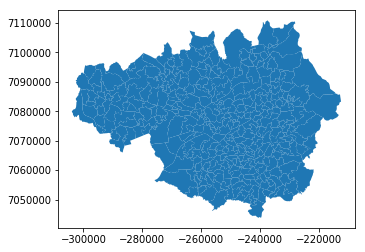

In [4]:
#1.2 Read in the shapefile for Greater Manchester

#url='https://www.dropbox.com/s/aszcrdge1v69py7/EPSG3857_MSOA_2011_clipped_Greater_Manchester_added_coordinates.shp'
#I'm having trouble reading in shapefiles from urls in geopandeas (probably because it needs the shx and dbf also)
#On Github, agaidus has a folder called census_data_extraction that offers a turnaround way but its long.
#So, for now, we'll stick to a local version of the data.

#input shapefile for MSOA in Greater Manchester
foldername_input = os.getcwd()+"/data/" 
inputfile_shapefile_MSOA_GM= foldername_input+ "EPSG3857_MSOA_2011_clipped_Greater_Manchester_added_coordinates.shp"

#Read in shapefile in geopandas
gp_MSOA_GM=gpd.read_file(inputfile_shapefile_MSOA_GM)

#Plot map from shapefile
#print ('\n We are now plotting the MSOAs of Greater Manchester')
gp_MSOA_GM.plot();  #notice that the ; at the and of the line is not necessary but surpresses some of the matplotlib metadata.

#Have a look at the database behind the shapefile
print ('\n The first five lines of the shapefile on MSOA in the Greater Manchester area look like this')
gp_MSOA_GM.head()#Get first 10 lines to be printed



Whoa, that experiment went well! As you can see, that python packages called geopandas is able to translate colums of geometry coordinates that are available in the shapefile for all the MSOAs in Greater Manchester into a neat little map. Besides these coordinates, however, there is not much information available in the shapefile and in extension the geopandas dataframe. If we want to make better maps with more information on them, we will have to enrich this geopandas dataframe with extra information. 

We will come back to this enriching later, let's first go and grab some extra information that could be useful for our analysis. 

#### 1.3.  Read in data on population and working population characteristics per MSOA

If like me, you are kind of a professional data gatherer, you probably have robbed the ONS and Census data sites multiple times right now. I admit, it is not really robbing as those data are for free, but still, it gives some kind of a cool red dead redemption vibe to it, doesn't it? Nevertheless, I spent some time robbing these databanks before and I came out with two datasets that seemed pretty damn useful to me. It consists of two files from ONS describing the characteristics of residential and working populations for all MSOAs in the UK. If you really want to know, I've got them from the KS101EW and KS603EW databases of the ONS, but I assume you don't really want to know so let's just load them in and have a look at them shall we: 

In [5]:
#1.3.1 Read in the data on population characteristics per MSOA in the UK

#Read in population csv in pandas
df_P=pd.read_csv("https://www.dropbox.com/s/v8wri2astoi92wd/KS101EW_Usual%20resident%20population.csv?raw=1")

#We rename some of the titles of the columns so that they are consistent with the names in the other data
titles_inputfile_population=["date",
		"MSOA11NM",#'geography' in the original file
		"MSOA11CD",#'geography code' in the original file
		"Rural Urban",#this file holds the totals of rural and urban areas
		"population", # 'All usual residents' in the original file
		"Males",
		"Females",
		"Lives in a household",
		"Lives in a communal establishment",
		"Schoolchild or full-time student aged 4 and over at their non term-time address",
		"Area (Hectares)",
		"Density (number of persons per hectare)"
		]
df_P.columns=titles_inputfile_population

print ('\n The first five lines of the inputdata on Population look like this')
df_P.head()#Get first 10 lines to be printed


 The first five lines of the inputdata on Population look like this


,date,MSOA11NM,MSOA11CD,Rural Urban,population,Males,Females,Lives in a household,Lives in a communal establishment,Schoolchild or full-time student aged 4 and over at their non term-time address,Area (Hectares),Density (number of persons per hectare)
0,2011,Darlington 001,E02002559,Total,8842,4364,4478,8828,14,130,13247.01,0.7
1,2011,Darlington 002,E02002560,Total,5997,2987,3010,5994,3,51,206.03,29.1
2,2011,Darlington 003,E02002561,Total,5741,2781,2960,5709,32,87,146.95,39.1
3,2011,Darlington 004,E02002562,Total,6066,3001,3065,5973,93,38,124.22,48.8
4,2011,Darlington 005,E02002563,Total,5463,2606,2857,5286,177,38,156.19,35.0


In [6]:
#1.3.2 Read in the data on working population characteristics per MSOA in the UK

#Read in working population csv in pandas
df_WP=pd.read_csv("https://www.dropbox.com/s/1ejko3b3mpf121b/KS603EW_Economic%20Activity%20by%20Sex_SelectionofVariables.csv?raw=1")

#We rename some of the titles of the columns so that they are consistent with the names in the other data
titles_inputfile_workingpopulation=["MSOA11CD",#'MSOA_code' in the original file
		"MSOA11NM",#'MSOA_name' in the original file
		"working population",# 'All usual residents aged 16 to 74' in the original file
		"Economically active",
		"Economically active_in employment",
		"Economically active_unemployed",
		"Economically active_full-time student",
		"Economically inactive"
		]
df_WP.columns=titles_inputfile_workingpopulation #hardcoded

print ('\n The first five lines of the inputdata on Working Population look like this')
df_WP.head()#Get first 10 lines to be printed



 The first five lines of the inputdata on Working Population look like this


,MSOA11CD,MSOA11NM,working population,Economically active,Economically active_in employment,Economically active_unemployed,Economically active_full-time student,Economically inactive
0,E02002559,Darlington 001,6521,4928,4609,165,154,1593
1,E02002560,Darlington 002,4462,3323,3006,181,136,1139
2,E02002561,Darlington 003,4342,3093,2816,171,106,1249
3,E02002562,Darlington 004,4473,3139,2672,331,136,1334
4,E02002563,Darlington 005,3912,2620,2366,168,86,1292


#### 1.4.  Read in data on working populations by occupation per MSOA

Ultimately, there is one last inputfile I've prepared, this time based on the DC6604EW database from census 2011. This dataset gathers the occupation by industry for people working in a certain MSOA. There are several categories of industries and occupations available in this original file, so to make things more workable I've preprocessed the data to a file that contains information on the total amount of workes (E), workers in services (S) and workers in industries (X) . Let's read it in and have a look at it!

In [7]:
#1.4 Read in the data on workers by occupation per MSOA in the UK
#Read in XSE csv in pandas
df_XSE=pd.read_csv('https://www.dropbox.com/s/79e47pjw3aoj8nf/XSE_WP6604EW_MSOA2011.csv?raw=1') 

titles_inputfile_xse=["MSOA11CD",#geography code in the original file
		"date",
		"MSOA11NM",#geography in the original file
		"E",#total amount of workers as defined by Maarten
		"S",#workers in services as defined by Maarten
		"X"#workers in industries as defined by Maarten
		]
df_XSE.columns=titles_inputfile_xse #hardcoded
print ('\n The first five lines of the inputdata on X,S,E employment numbers look like this')
df_XSE.head()#Get first 5 lines to be printed


 The first five lines of the inputdata on X,S,E employment numbers look like this


,MSOA11CD,date,MSOA11NM,E,S,X
0,E02002559,2011,Darlington 001,11098,1430,9668
1,E02002560,2011,Darlington 002,1054,277,777
2,E02002561,2011,Darlington 003,966,276,690
3,E02002562,2011,Darlington 004,1608,291,1317
4,E02002563,2011,Darlington 005,969,507,462


### 2. Process the data 

Since we are interested in data from the Greater Machester (GM) area only, we can now use the MSOAS from the GM shapefile to filter our inputfiles to only those MSOAs that lie within the GM only. This will make the data we have to treat less heavy. As by nature, scientists are a tad lazy (or just efficient, depending on your point of view), this is definitely something we should pursue.

#### 2.1 Filter OD data to GM region

Jokes aside, for the case of the commuting flows, and in extension the spatial interaction models we will use to describe them later, this filtering has consequences. Specifically, filtering the way we do means that all people that live outside the GM and commute towards it are excluded from our analysis. The same is true for people living within the GM area and commuting outside. There observations too are omitted. 

In other words, we will only keep the commuting flows from people that both live and work within the GM area. 

In [8]:
#2.1 Filter OD file for Greater Manchester only.

#Get a list of all the GM areas
MSOA_GM_list = gp_MSOA_GM['MSOA11CD'].tolist() 

print ('There are ' + str(len(MSOA_GM_list)) + ' unique MSOAs in the GM region' )#len(MSOA_GM_list)=369

#Filter flows that have an area of residence AND an area of workplace in GM, based on the list of GM areas
df_OD_GM=df_OD[(df_OD['Area of residence'].isin(MSOA_GM_list)) & (df_OD['Area of workplace'].isin(MSOA_GM_list))]

#check whether selection was done well
if df_OD_GM['Area of residence'].nunique() != len(MSOA_GM_list):
	print ('\nThe selection of areas in the OD csv file was NOT done well')
else:
	print ('\nWe will be working with the OD of ' + str(df_OD_GM['Area of residence'].nunique()) + ' unique MSOA areas and for ' + str(df_OD_GM.shape[0]) + ' links between these areas')


There are 369 unique MSOAs in the GM region

We will be working with the OD of 369 unique MSOA areas and for 76387 links between these areas


#### 2.2.  Add missing information to OD data for GM region

As you might have noticed, the 76387 links between MSOA areas that are in our OD dataset are not all combinations betzeen 369 MSOAs that could theoretically exists (theoretically you could expect 369 times 369 = 136161 combinations to exist). The reason is because our OD dataset only holds links for which people commute between two MSOAs. Combinations of MSOAs for which no commuters were observed (so link=0) are not in the dataset. 

In the next bit of the code, we add this information ourselves. The code to do so is more difficult but don't bother about it. It's merely a technical thing we want to set straight before continuing our analysis. 

In [9]:
#2.2 Extend the existing OD file with entries for combinatons of MSOAS that have no flows between them

#We create a file with all combinations of MSOAs having zero values. 
#This is a much faster way than, for example, using itertools.product or itertools.permutation.
np_matrix_zeroes = np.zeros(shape=(len(MSOA_GM_list),len(MSOA_GM_list))) #create numpy matrix full of zeroes
df_tussen = pd.DataFrame(np_matrix_zeroes, columns=MSOA_GM_list) #convert to dataframe with areas as columns and index
df_tussen['forindex']=MSOA_GM_list #create column with MSOA areas 
df_tussen=df_tussen.set_index('forindex') #set msoa areas as index

df_tussen_multiindex=df_tussen.stack()#convert panda dataframes to multindex series with index and columns as indices and zeroes as values. 
#type(df_tussen_multiindex) #= pandas.core.series.Series
#remark that the previous step results in a Series object (only one column, so automatically transformed to a series by pandas)
#We convert it back to a dataframe so we can create columns from the multiindex indices. 
df_tussen_dataframe=df_tussen_multiindex.to_frame()
df_tussen_dataframe.reset_index(inplace=True)#Translate multiindeices to columns.
df_tussen_dataframe.columns=['Area_workplace','Area_residence','Zero'] 

#Quick check on the numbers
if df_tussen_dataframe.shape[0] != math.pow(len(MSOA_GM_list),2): #Naive error checks
	print ('\nThere has been an error in our method to create a file holding all combinations of MSOAs')
elif df_tussen_dataframe.shape[0] > df_OD_GM.shape[0]:
	sparsity_factor=float(df_OD_GM.shape[0])/float(math.pow(len(MSOA_GM_list),2))
	print ('\nThe original OD file describes only ' + str(float(sparsity_factor)*100) + ' percent of all the potential combinations between MSOAS')
	print ('\nTo get to 100 percent, we will now extend the OD file to all combinations of MSOAS by filling in ' + str(math.pow(len(MSOA_GM_list),2)-df_OD_GM.shape[0]) + ' MSOA combinations with zeroes.')

#Do left join between the all potential flows dataframe and the existing flows. Fill non existing flows with zeroes. Make copy to work on.
df_OD_GM_extzero = pd.merge(df_tussen_dataframe, df_OD_GM,  how='left', left_on=['Area_workplace','Area_residence'], right_on = ['Area of workplace','Area of residence']).fillna(0).copy()
df_OD_GM_extzero=df_OD_GM_extzero.drop(columns=['Zero', 'Area of residence', 'Area of workplace']) #Drop unnecessary columns. #Remark that we drop area of workplace and residence because they either became redundant or have become zero for the combinations of MSOAs where no flows existed. 

print ('\n The first five lines of the OD data filtered for GM and filled up with zeroes look like this')
df_OD_GM_extzero.head()#Get first 5 lines to be printed


The original OD file describes only 56.10049867436344 percent of all the potential combinations between MSOAS

To get to 100 percent, we will now extend the OD file to all combinations of MSOAS by filling in 59774.0 MSOA combinations with zeroes.

 The first five lines of the OD data filtered for GM and filled up with zeroes look like this


,Area_workplace,Area_residence,All categories Method of travel to work,Work mainly at or from home,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work
0,E02001072,E02001072,96.0,0.0,0.0,0.0,16.0,0.0,0.0,42.0,0.0,6.0,32.0,0.0
1,E02001072,E02001074,37.0,0.0,0.0,1.0,4.0,0.0,0.0,17.0,2.0,0.0,13.0,0.0
2,E02001072,E02001077,25.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,0.0,6.0,5.0,0.0
3,E02001072,E02001079,8.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0
4,E02001072,E02001187,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


#### 2.3.  Calculate distances between MSOAs in the GM region, add this information to the OD data 

Besides information on how many commuters flow from one MSOA to another, our spatial interaction models are also going to need information on the distances between those MSOAs. In the following code, we will use the coordinates of the MSOAs from the geopandas shapefile, to calculate distances between MSOAS which we will then appends as an extra column in the df_OD_GM_extwero dataframes

In [10]:
#2.3. Enrich OD file data with information on the geographic position. Calculate distances between all MSOA's combinations, map flows

#Add x and y coordinates of centroids of the areas by joining the OD file with the geopandas dataframe that contains the coords. 
df_OD_GM_extzero_xy = pd.merge(df_OD_GM_extzero, gp_MSOA_GM[['MSOA11CD','xcoord','ycoord']], left_on='Area_workplace', right_on='MSOA11CD', how='left', sort=False);
df_OD_GM_extzero_xy.rename(columns={'xcoord': 'xcoord_work', 'ycoord': 'ycoord_work'}, inplace=True)
df_OD_GM_extzero_xy = pd.merge(df_OD_GM_extzero_xy, gp_MSOA_GM[['MSOA11CD','xcoord','ycoord']], left_on='Area_residence', right_on='MSOA11CD', how='left', sort=False);
df_OD_GM_extzero_xy.rename(columns={'xcoord': 'xcoord_residence', 'ycoord': 'ycoord_residence'}, inplace=True)
#Drop unneccessary columns
df_OD_GM_extzero_xy=df_OD_GM_extzero_xy.drop(columns=['MSOA11CD_x','MSOA11CD_y'])

#Calculate distances between all MSOAs combinations
print ('\n We are calculating the distances for all MSOAs combinations, this might take some time')


#helperfunction to create distances in the EPSG3857 projection
def haversine(row):
	"""
	Calculate the great circle distance between two points 
	on the earth (specified in m if we use the EPSG3857 projection)
	"""
	# convert decimal degrees to radians 
	lon1, lat1, lon2, lat2 = map(math.radians, [float(row['xcoord_work']),float(row['ycoord_work']),float(row['xcoord_residence']),float(row['ycoord_residence'])])
	# haversine formula
	dlon = lon2 - lon1 
	dlat = lat2 - lat1 
	a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
	c = 2 * math.asin(math.sqrt(a)) 
	distance = 6367 * c
	return distance

#Apply helperfunctie to create new column 'distance':
df_OD_GM_extzero_xy['distance'] = df_OD_GM_extzero_xy.apply (lambda row: haversine (row),axis=1)

print ('\n The first five lines of the OD data filtered for GM, filled up with zeroes, and complemented with distances look like this')
df_OD_GM_extzero_xy.head()#Get first 5 lines to be printed


 We are calculating the distances for all MSOAs combinations, this might take some time

 The first five lines of the OD data filtered for GM, filled up with zeroes, and complemented with distances look like this


,Area_workplace,Area_residence,All categories Method of travel to work,Work mainly at or from home,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work,xcoord_work,ycoord_work,xcoord_residence,ycoord_residence,distance
0,E02001072,E02001072,96.0,0.0,0.0,0.0,16.0,0.0,0.0,42.0,0.0,6.0,32.0,0.0,-251727.45798,7066824.59,-251727.45798,7.066825e+06,0.000000
1,E02001072,E02001074,37.0,0.0,0.0,1.0,4.0,0.0,0.0,17.0,2.0,0.0,13.0,0.0,-251727.45798,7066824.59,-249571.36158,7.065809e+06,7190.119737
2,E02001072,E02001077,25.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,0.0,6.0,5.0,0.0,-251727.45798,7066824.59,-252503.25191,7.064591e+06,9874.335623
3,E02001072,E02001079,8.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,-251727.45798,7066824.59,-249672.81239,7.064270e+06,12020.751998
4,E02001072,E02001187,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,-251727.45798,7066824.59,-239807.20388,7.065682e+06,8080.121205


##### 2.1.2. Merge population, working population and working population by occupation data and filter to GM region 

To filter our three datasets on (working) populations is a tad easier than filtering the OD dataset. The next bit of codes will first couple all three datasets to eachother (P, WP and XSE) before filtering them so that they hold the GM MSOAS only. Notice, however, that we do not take all the information of the datasets on board. We'll focus only on the population, working population, X,S, and E values. The original datasets hold a lot more information but we will disregard that for now.

In [11]:
#2.1.2 Merge the P,WP and XSE dataframes for the entire UK

#Test that the input shapes are similar their number of rows should accord and be 7201 - the number of MSOAs in the UK
#print ("Test to see whether the shape of the inputfiles (all on MSOA level), are the same. ") 
#print(df_P.shape)
#print(df_WP.shape)
#print(df_XSE.shape)

#Join P and WP
df_PWP_full = df_P.merge(df_WP, on=['MSOA11CD','MSOA11NM'])
df_PWP_tussen=df_PWP_full[['MSOA11CD','MSOA11NM','population','working population']].copy()

#print ('\n The first five lines of the inputdata on Employment and Population look like this')
#print df_PWP_tussen.head()#Get first 10 lines to be printed

#Join PWP and XSE
df_PWPXSE_full = df_PWP_tussen.merge(df_XSE, on=['MSOA11CD','MSOA11NM'])
df_PWPXSE=df_PWPXSE_full[['MSOA11CD','MSOA11NM','population','working population','X','S','E']].copy()

print ('\n The first five lines of the EPXSE data look like this')
df_PWPXSE.head()#Get first 10 lines to be printed


 The first five lines of the EPXSE data look like this


,MSOA11CD,MSOA11NM,population,working population,X,S,E
0,E02002559,Darlington 001,8842,6521,9668,1430,11098
1,E02002560,Darlington 002,5997,4462,777,277,1054
2,E02002561,Darlington 003,5741,4342,690,276,966
3,E02002562,Darlington 004,6066,4473,1317,291,1608
4,E02002563,Darlington 005,5463,3912,462,507,969


In [12]:
#2.1.2 Filter the newly merged PWPXSE dataframes to GM region only

#Get a list of all the GM areas
MSOA_GM_list = gp_MSOA_GM['MSOA11CD'].tolist() #len(MSOA_GM_list)=369

#Filter rows that have an MSOA in GM, based on the list of GM areas
df_PWPXSE_GM=df_PWPXSE[df_PWPXSE['MSOA11CD'].isin(MSOA_GM_list)]

#Check whether filtering was done correctly
if df_PWPXSE_GM.shape[0]!= len(MSOA_GM_list):
	print ('\n The filtering was not done correctly, shapes don not match after filtering')
else:
	print ('\n The filtering was done correctly, the number of rows for the df_PWPXSE now is: ' + str(df_PWPXSE_GM.shape[0]))
        


 The filtering was done correctly, the number of rows for the df_PWPXSE now is: 369


### 3. Analyse data 

#### 3.1. Visualise the flow data

There are multiple ways to visualise the commuting flows for GM. One way could be to create a origin-destrination matrix which visualises the amount of commuters between all pairs of MSOAs:

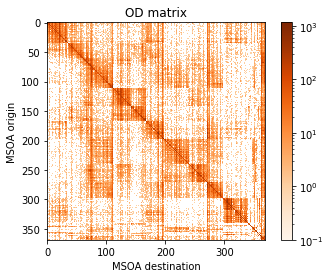

In [13]:
# 3.1 Create a matrix representation of the OD dataframe, use the "All categories Method of travel to work" as values for flows
df_OD_GM_extzero_xy_matrix=df_OD_GM_extzero_xy.pivot_table(index="Area_residence", columns="Area_workplace", values= "All categories Method of travel to work", fill_value=0)

# Translate to numpy, make a copy to work on.
np_OD_GM_extzero_xy_matrix=df_OD_GM_extzero_xy_matrix.to_numpy(copy=True)

#Show the OD-matrix
plt.imshow(np_OD_GM_extzero_xy_matrix, cmap=plt.cm.Oranges, norm=clr.LogNorm(vmin=np_OD_GM_extzero_xy_matrix.min()+0.1, vmax=np_OD_GM_extzero_xy_matrix.max()))
plt.title('OD matrix')
plt.xlabel('MSOA destination')
plt.ylabel('MSOA origin')
plt.colorbar()
plt.show()

What you can observe in this OD matrix is that there are a lot of MSOA pairs that do not have any commuters between them (colored white), and that there are some clusters of multiple MSOA combinations that have a lot of commuters amonst them but les so with others MSOAS (the 9 red squares in the diagonal of the picture). These clusters clearly are intersting, but without a map, it is going to be difficult to find out where these clusters of MSOAS are situated in the region.

#### 3.2. Visualise the working populations data

To visualise the PWPXSE data, it suffices to join the PWPXSE dataframe with the geopandas dataframe containing the MSOAs in GM only. This join would mean that all our PWPXSE information will be added to the geopandas dataframe, which means that we then have the possibility to plot the information on a map. That's a win-win!

Don't be afraid of the second part of the code where we plot the map. It seems like a lot of code for a simple map, but it is just to make the figure look a bit nicer than the default settings. 

In [14]:
#3.2. Enrich the geopandas shapefile of GM with data on population, working population and XSE.

#We use both the Name and Code of the MSOA11 to merge. Although normally, one should suffice. Safety my friends.
gp_MSOA_GM_PWPXSE = gp_MSOA_GM.merge(df_PWPXSE_GM, on=['MSOA11CD','MSOA11NM'])

#Check whether dimensions are still the same after the merge. 
if gp_MSOA_GM_PWPXSE.shape[0] != df_PWPXSE_GM.shape[0]:
	print ('\n The merge we just performed has reduced the dimensions of your inputdata on employment, population and XSE. This is not what we would expect. The shapes of both datasets are:')
	print (gp_MSOA_GM_PWPXSE.shape)
	print (df_PWPXSE.shape)
else:
	print ('\nThis merge has not reduced the dimensions of your inputdata on employment, population and XSE. This is what we expected since we filtered the data for GM first')
    


This merge has not reduced the dimensions of your inputdata on employment, population and XSE. This is what we expected since we filtered the data for GM first



 We are now plotting the MSOAs in Greater Manchester coloring them by their population, employment and occupation numbers


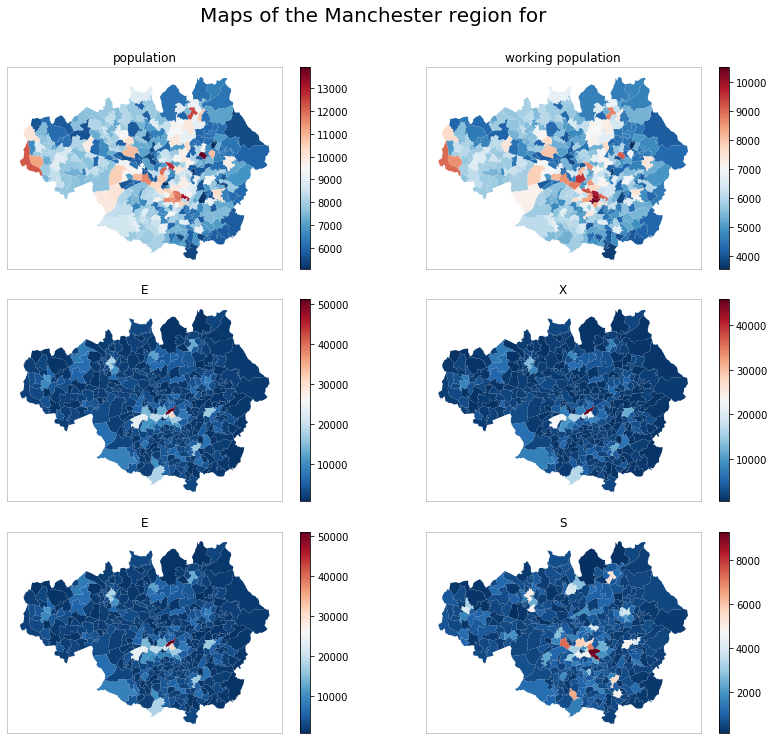

In [15]:
#3.2. Use the enriched geopandas shapefile to map data on population, working population and XSE.

print ('\n We are now plotting the MSOAs in Greater Manchester coloring them by their population, employment and occupation numbers')

#Setup figure
ncols=2 
nrows=3

figsize_x_cm=30 #We want our plot to be as wide as the page (21-3left-3right) in centimeter. 
figsize_x_inches=figsize_x_cm/2.54 #matplotlibs figsize (currently) is in inches only. 
ratio_x_y=0.9 #0.9 for two rows, 
figsize_y_inches=figsize_x_inches*ratio_x_y 

fig, axarr = plt.subplots(figsize=(figsize_x_inches,figsize_y_inches), ncols=ncols, nrows=nrows, sharex=False, sharey=False)
#axarr[row][col]

left   =  0.05  # the left side of the subplots of the figure
right  =  0.97    # the right side of the subplots of the figure
bottom =  0.03    # the bottom of the subplots of the figure
top    =  0.90    # the top of the subplots of the figure
wspace =  .15     # the amount of width reserved for blank space between subplots
hspace =  .15    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
left    =  left, 
bottom  =  bottom, 
right   =  right, 
top     =  top, 
wspace  =  wspace, 
hspace  =  hspace
	)

#Set figure title 
title=str('Maps of the Manchester region for')
plt.suptitle(title, fontsize=20)

#gp_MSOA_GM.plot(ax=axarr[0][0],column='employment',legend=False)
#gp_MSOA_GM.plot(ax=axarr[0][1],column='E',legend=False)
#gp_MSOA_GM.plot(ax=axarr[1][0],column='X',legend=False)
#gp_MSOA_GM.plot(ax=axarr[1][1],column='S',legend=False)

variables_to_plot=['population','working population','E','X','E','S']
counter=0
for row in range(nrows):
	for col in range(ncols):

		color_max=50000
		gp_MSOA_GM_PWPXSE.plot(ax=axarr[row][col],column=variables_to_plot[counter],legend=True,
			norm=clr.Normalize(vmin=0,vmax=50000),cmap='RdBu_r')

		#axarr[row][col].legend(loc='upper right')
		#axarr[row][col].get_legend().set_bbox_to_anchor((1,0.5))
		#axarr[row][col].get_legend().set_title('lol') 
		
		# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly. 
		axarr[row][col].set_aspect('equal')

		#Set title of subplot
		title_name=variables_to_plot[counter]
		axarr[row][col].set_title(title_name,fontsize=12)

		##Set ticks and labels van de assen invisible, niemand is geinteresseerd in de lat,lon coords.
		axarr[row][col].get_xaxis().set_visible(False)
		axarr[row][col].get_yaxis().set_visible(False)

		# Make frame lighter and change line-width:
		for pos in ['top','bottom','left','right']:
			axarr[row][col].spines[pos].set_linewidth(0.5)
			axarr[row][col].spines[pos].set_color('0.6')

		counter=counter+1

plt.show()
plt.close('all')

### 4 Read out the final datasets

Now thate our data are explored and processed, we will read them out so that they can be used properly in the next tutorials. We will read out two datasets specifically: 

1. The df_OD_GM_extzero_xy dataframe, containing the flows of different commuting types between the MSOAs in the Greater Manchester. Pairs of MSOA that do not have any commuting between them are added to the dataset but their commuting numbers are 0. Additionally, x,y coordinates of the MSOA center points are given and distances are calculated between each pair of MSOAs. 
2. The gp_MSOA_GM_PWPXSE geopandas dataframe, containing for each MSOA in the Greater Manchester region information on the residential population, the working population and the latter for different industries. 



In [16]:
#4.1 Read out the OD dataset for Greater Manchester
#Store output in our data folder
foldername_output = os.getcwd()+"/data/" 

outputname_df= foldername_output+ "df_OD_GM_extzero_xy.csv"
df_OD_GM_extzero_xy.to_csv(outputname_df)

#4.2 Read out the geopandas dataset for Greater Manchester. 

outputname_gp= foldername_output+ 'gp_MSOA_GM_PWPXSE'
#Tis will create a folder storing geopandas dataframe as a shapefile.
gp_MSOA_GM_PWPXSE.to_file(outputname_gp)
